<a href="https://colab.research.google.com/github/Eddy109109/DKU/blob/main/2021_02_04DataAnalyst_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import string
import nltk
from nltk.corpus import stopwords
!pip install chart-studio
import chart_studio.plotly as py 
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from collections import defaultdict
import warnings
warnings.filterwarnings("ignore")
nltk.download('stopwords')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

     |████████████████████████████████| 71kB 3.5MB/s 
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
df = pd.read_csv("DataAnalyst.csv")

In [ ]:
df.head(3)

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,0,"Data Analyst, Center on Immigration and Justic...",$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,2,"Senior Data Analyst, Insights & Analytics Team...",$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1


In [ ]:
df = df.drop('Unnamed: 0', axis = 1)

In [ ]:
df.describe()

,Rating,Founded
count,2253.000000,2253.000000
mean,3.160630,1398.522858
std,1.665228,901.929251
min,-1.000000,-1.000000
25%,3.100000,-1.000000
50%,3.600000,1979.000000
75%,4.000000,2002.000000
max,5.000000,2019.000000


In [ ]:
df.describe(include='all')

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
count,2253,2253,2253,2253.000000,2252,2253,2253,2253,2253.000000,2253,2253,2253,2253,2253,2253
unique,1272,90,2253,NaN,1513,253,483,9,NaN,15,89,25,14,291,2
top,Data Analyst,$42K-$76K (Glassdoor est.),Description\n\n\nDiscover your opportunity wit...,NaN,"Staffigo Technical Services, LLC\n5.0","New York, NY","New York, NY",51 to 200 employees,NaN,Company - Private,-1,Information Technology,Unknown / Non-Applicable,-1,-1
freq,405,57,1,NaN,58,310,206,421,NaN,1273,353,570,615,1732,2173
mean,NaN,NaN,NaN,3.160630,NaN,NaN,NaN,NaN,1398.522858,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,1.665228,NaN,NaN,NaN,NaN,901.929251,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,-1.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,3.600000,NaN,NaN,NaN,NaN,1979.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,2002.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.isnull().sum()

Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         1
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
Easy Apply           0
dtype: int64

In [ ]:
df.shape[0]

2253

NameError: ignored

In [ ]:
def mis_val(df):
  miss_val = df.isnull().sum()
  miss_val_per = miss_val / len(df) *100
  miss_val_df = pd.concat([miss_val, miss_val_per], axis = 1)
  miss_val_df = miss_val_df.rename(columns = {0 : 'missing_values', 1 : '%_of_total_values'})

  miss_val_df=miss_val_df[miss_val_df['missing_values']!=0]
  miss_val_df = miss_val_df.sort_values('_%of_total_values', ascending=False)
  return miss_val_df

In [ ]:
miss_val(df)

,missing_values,%_of_total_values
Company Name,1,0.044385


In [ ]:
df['Job Title']= df['Job Title'].str.split(',',1).str[0]
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply
0,Data Analyst,$37K-$66K (Glassdoor est.),Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice\n3.2,"New York, NY","New York, NY",201 to 500 employees,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),-1,True
1,Quality Data Analyst,$37K-$66K (Glassdoor est.),Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York\n3.8,"New York, NY","New York, NY",10000+ employees,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,-1
2,Senior Data Analyst,$37K-$66K (Glassdoor est.),We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace\n3.4,"New York, NY","New York, NY",1001 to 5000 employees,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,-1
3,Data Analyst,$37K-$66K (Glassdoor est.),Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity\n4.1,"New York, NY","McLean, VA",201 to 500 employees,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),-1,-1
4,Reporting Data Analyst,$37K-$66K (Glassdoor est.),ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel\n3.9,"New York, NY","New York, NY",501 to 1000 employees,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True


In [ ]:
df['Industry'].value_counts().head(10)

-1                                         353
IT Services                                325
Staffing & Outsourcing                     323
Health Care Services & Hospitals           151
Consulting                                 111
Computer Hardware & Software               111
Investment Banking & Asset Management       78
Enterprise Software & Network Solutions     69
Internet                                    65
Banks & Credit Unions                       51
Name: Industry, dtype: int64

In [ ]:
df['Sector'].value_counts().head(10)

Information Technology    570
Business Services         524
-1                        353
Finance                   169
Health Care               151
Education                  52
Insurance                  51
Accounting & Legal         43
Media                      42
Manufacturing              40
Name: Sector, dtype: int64

In [ ]:
df['Competitors'].value_counts().head(10)

-1                                                      1732
Adecco, Manpower                                          14
Robert Half, Insight Global                               14
Google, Microsoft, Samsung Electronics                    10
Artech Information Systems, Mindlance, Tech Mahindra      10
TEKsystems, Insight Global, Accenture                     10
Adecco, Kforce                                             9
State Street, Northern Trust, BlackRock                    9
Accenture, CGI, Sopra Steria                               7
Kforce, Insight Global, Volt Consulting Group              7
Name: Competitors, dtype: int64

In [ ]:
df['Easy Apply'].value_counts().head(10)

-1      2173
True      80
Name: Easy Apply, dtype: int64

In [ ]:
df['Revenue'].value_counts().head(10)

Unknown / Non-Applicable      615
$100 to $500 million (USD)    218
$50 to $100 million (USD)     199
$10+ billion (USD)            189
-1                            163
$10 to $25 million (USD)      132
$2 to $5 billion (USD)        129
$1 to $5 million (USD)        111
$25 to $50 million (USD)      110
Less than $1 million (USD)     93
Name: Revenue, dtype: int64

In [ ]:
num_lst=[-1,-1.0,'-1']
for num in num_lst:
    df=df.replace(num,np.nan)

In [ ]:
df['Salary Estimate'].value_counts().head(10)

$42K-$76K (Glassdoor est.)     57
$41K-$78K (Glassdoor est.)     57
$50K-$86K (Glassdoor est.)     41
$35K-$67K (Glassdoor est.)     33
$60K-$124K (Glassdoor est.)    31
$43K-$76K (Glassdoor est.)     31
$58K-$93K (Glassdoor est.)     31
$30K-$53K (Glassdoor est.)     30
$97K-$129K (Glassdoor est.)    30
$51K-$88K (Glassdoor est.)     30
Name: Salary Estimate, dtype: int64

In [ ]:
df['Salary Estimate'],_=df['Salary Estimate'].str.split('(', 1).str
df['salary_min'],df['salary_max']=df['Salary Estimate'].str.split('-').str
df['salary_max']=df['salary_max'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
df['salary_min']=df['salary_min'].str.strip(' ').str.lstrip('$').str.rstrip('K').fillna(0).astype('int')
df.drop('Salary Estimate',axis=1,inplace=True)

In [ ]:
df['Size'].value_counts()

51 to 200 employees        421
10000+ employees           375
1001 to 5000 employees     348
1 to 50 employees          347
201 to 500 employees       249
501 to 1000 employees      211
5001 to 10000 employees     97
Unknown                     42
Name: Size, dtype: int64

In [ ]:
df['Size'],_=df['Size'].str.split(" e").str

In [ ]:
df['Company Name'].value_counts().head(5)

Staffigo Technical Services, LLC\n5.0    58
Diverse Lynx\n3.9                        22
Kforce\n4.1                              19
Lorven Technologies Inc\n4.0             19
Robert Half\n3.5                         14
Name: Company Name, dtype: int64

In [ ]:
df['Company Name'],_=df['Company Name'].str.split('\n', 1).str

In [ ]:
df['City'],df['State']=df['Location'].str.split(', ', 1).str
df['State']=df['State'].replace("Arapahoe, CO","CO")
df.drop('Location',axis=1,inplace=True)
df.head()

,Job Title,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,salary_min,salary_max,City,State
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",201 to 500,1961.0,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37,66,New York,NY
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY",10000+,1893.0,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,NaN,37,66,New York,NY
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY",1001 to 5000,2003.0,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,NaN,37,66,New York,NY
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"McLean, VA",201 to 500,2002.0,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,NaN,37,66,New York,NY
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY",501 to 1000,2009.0,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,66,New York,NY


In [ ]:
df['Size'].fillna('Unknown',inplace=True)

df['Founded']=df['Founded'].fillna("0").astype(int)

df['Type of ownership'].fillna('Unknown',inplace=True)

df['Sector'].fillna('Unknown',inplace=True)

df['Easy Apply']=df['Easy Apply'].fillna("False").astype("bool")

In [ ]:
def filter_revenue(x):
    revenue=0
    if(x== 'Unknown / Non-Applicable' or type(x)==float):
        revenue=0
    #값이 없거나 float타입은 지운다

    elif(('million' in x) and ('billion' not in x)):
        maxRev = x.replace('(USD)','').replace("million",'').replace('$','').split('to')
        
        if('Less than' in maxRev[0]):
            revenue = float(maxRev[0].replace('Less than','').strip())
       
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])
    

    elif(('billion'in x)):
        maxRev = x.replace('(USD)','').replace("billion",'').replace('$','').split('to')
        if('+' in maxRev[0]):
            revenue = float(maxRev[0].replace('+','').strip())*1000
        else:
            if(len(maxRev)==2):
                revenue = float(maxRev[1])*1000
            elif(len(maxRev)<2):
                revenue = float(maxRev[0])*1000
    return revenue

In [ ]:
df['Max_revenue']=df['Revenue'].apply(lambda x: filter_revenue(x))
df.head()

,Job Title,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,salary_min,salary_max,City,State,Max_revenue
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",201 to 500,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37,66,New York,NY,500.0
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY",10000+,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,True,37,66,New York,NY,5000.0
2,Senior Data Analyst,We’re looking for a Senior Data Analyst who ha...,3.4,Squarespace,"New York, NY",1001 to 5000,2003,Company - Private,Internet,Information Technology,Unknown / Non-Applicable,GoDaddy,True,37,66,New York,NY,0.0
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"McLean, VA",201 to 500,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,True,37,66,New York,NY,100.0
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY",501 to 1000,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,66,New York,NY,500.0


In [ ]:
df['Job Title'][~pd.isnull(df['Job Title'])]

0                                            Data Analyst
1                                    Quality Data Analyst
2                                     Senior Data Analyst
3                                            Data Analyst
4                                  Reporting Data Analyst
                              ...                        
2248    RQS - IHHA - 201900004460 -1q Data Security An...
2249                Senior Data Analyst (Corporate Audit)
2250                      Technical Business Analyst (SQL
2251                                       Data Analyst 3
2252                          Senior Quality Data Analyst
Name: Job Title, Length: 2253, dtype: object

In [ ]:
df['Job Title']

0                                            Data Analyst
1                                    Quality Data Analyst
2                                     Senior Data Analyst
3                                            Data Analyst
4                                  Reporting Data Analyst
                              ...                        
2248    RQS - IHHA - 201900004460 -1q Data Security An...
2249                Senior Data Analyst (Corporate Audit)
2250                      Technical Business Analyst (SQL
2251                                       Data Analyst 3
2252                          Senior Quality Data Analyst
Name: Job Title, Length: 2253, dtype: object

In [ ]:
[~pd.isnull(df['Job Title'])]

[0       True
 1       True
 2       True
 3       True
 4       True
         ... 
 2248    True
 2249    True
 2250    True
 2251    True
 2252    True
 Name: Job Title, Length: 2253, dtype: bool]

In [ ]:
job_title=df['Job Title'][~pd.isnull(df['Job Title'])]

In [ ]:
WordCloud(background_color='white',width=500,height= 200).generate(' '.join(job_title))

In [ ]:
set(stopwords.words('english')).head(5)

AttributeError: ignored

In [ ]:
# Removing stopwords
def removing_stopwords(text):
   #removing some important stopwords from stopwords
    Stopwords=set(stopwords.words('english'))
    return " ".join([word for word in str(text).split() if word not in Stopwords])

In [ ]:
pg_lan = ["python","c++","java","matlab",".net","c#","javascript","html","bash"]
big_data = ["big data","hadoop","spark","impala","cassandra","kafka","hdfs","hbase","hive"]
job = df["Job Description"].tolist()
job = [x.lower() for x in job]

In [ ]:
pg_lan_required = defaultdict()
for item in pg_lan:
    counter = 0
    for it in job:
        if item in it:
            counter = counter + 1
    pg_lan_required[item] = counter

pg_lan_df = pd.DataFrame(list(pg_lan_required.items()),columns = ['Programming Langauge','count']) 
pg_lan_df.sort_values(["count"], axis=0, ascending=False, inplace=True)

(array([  0., 100., 200., 300., 400., 500., 600., 700.]),
 <a list of 8 Text major ticklabel objects>)

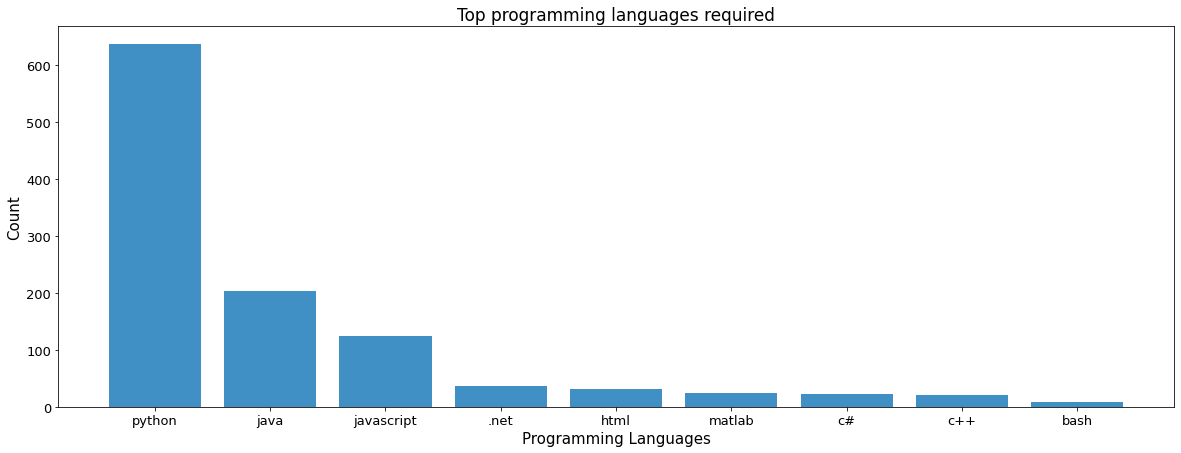

In [ ]:
plt.figure(figsize = (20,7))
x = pg_lan_df["Programming Langauge"]
y = pg_lan_df["count"]
plt.bar(x,y,color= "#4090c5")
plt.title("Top programming languages required",fontsize=17)
plt.xlabel("Programming Languages",fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

In [ ]:
pd.DataFrame(df.groupby('State').count().iloc[:,1]).head(3)

,Job Description
State,
AZ,97
CA,626
CO,96


In [ ]:
statewise_count=pd.DataFrame(df.groupby('State').count().iloc[:,1]).reset_index()


data = dict(type='choropleth',
            locations = statewise_count['State'],
            locationmode = 'USA-states',
            colorscale='blues',
            z = statewise_count['Job Description'],
            colorbar = {'title':"number of jobs"}
            )

layout = dict(title = 'Data Analyst jobs per state',geo = dict(scope='usa'))

choromap = go.Figure(data = [data],layout = layout)
iplot(choromap)

In [ ]:
statewise_count.head(3)

,State,Job Description
0,AZ,97
1,CA,626
2,CO,96


In [ ]:
choromap

In [ ]:
iplot(choromap)

iplot(choromap)

In [ ]:
salary_df=df.copy()
salary_df['mean_salary']=(df['salary_max']+df['salary_min'])/2
state_salary=pd.DataFrame(salary_df.groupby('State')['mean_salary'].mean()).reset_index()
state_salary

data = dict(type='choropleth',
            locations = state_salary['State'],
            locationmode = 'USA-states',
            colorscale = 'blues',
            z = state_salary['mean_salary'],
            colorbar = {'title':"salary"}
            )

layout = dict(title = 'mean salary based on state',geo = dict(scope='usa'))

#choromap = go.Figure(data = [data],layout = layout)
#iplot(choromap)

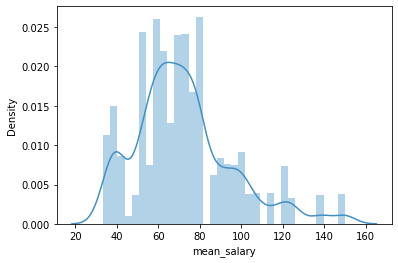

In [ ]:
sns.distplot(salary_df.loc[salary_df['mean_salary']!=0, 'mean_salary'], color ="#4090c5")

Text(0.5, 1.0, 'distribution of mean salary')

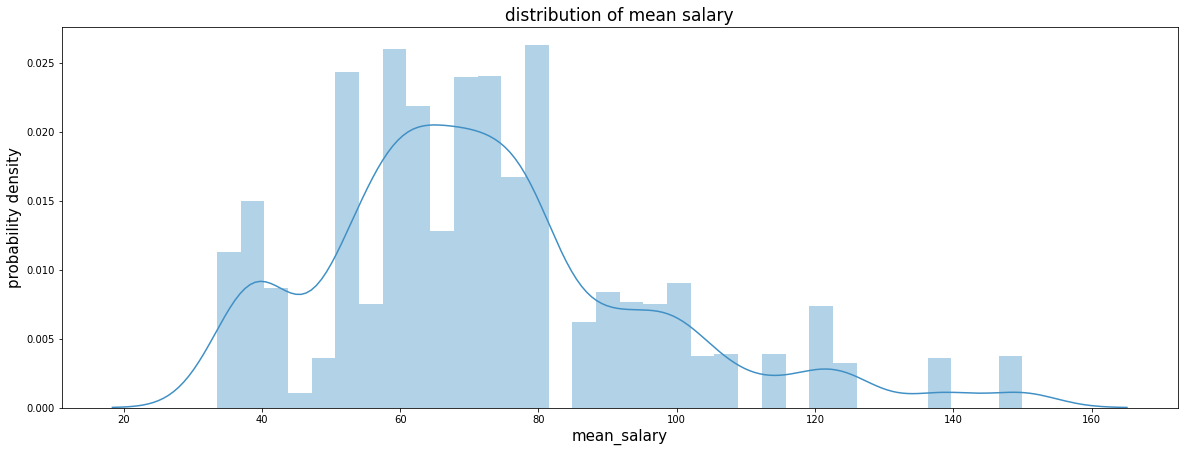

In [ ]:
plt.figure(figsize=(20,7))
sns.distplot(salary_df.loc[salary_df['mean_salary']!=0,'mean_salary'],color="#4090c5")
plt.xlabel('mean_salary',fontsize=15)
plt.ylabel('probability density',fontsize=15)
plt.title('distribution of mean salary',fontsize=17)

In [ ]:
temp_df=salary_df[salary_df['Max_revenue']!=0]
size_revenue=pd.DataFrame(temp_df.groupby('Size')['mean_salary'].mean().sort_values()).reset_index()

In [ ]:
temp_df

,Job Title,Job Description,Rating,Company Name,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Easy Apply,salary_min,salary_max,City,State,Max_revenue,mean_salary
0,Data Analyst,Are you eager to roll up your sleeves and harn...,3.2,Vera Institute of Justice,"New York, NY",201 to 500,1961,Nonprofit Organization,Social Assistance,Non-Profit,$100 to $500 million (USD),NaN,True,37,66,New York,NY,500.0,51.5
1,Quality Data Analyst,Overview\n\nProvides analytical and technical ...,3.8,Visiting Nurse Service of New York,"New York, NY",10000+,1893,Nonprofit Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),NaN,True,37,66,New York,NY,5000.0,51.5
3,Data Analyst,Requisition NumberRR-0001939\nRemote:Yes\nWe c...,4.1,Celerity,"McLean, VA",201 to 500,2002,Subsidiary or Business Segment,IT Services,Information Technology,$50 to $100 million (USD),NaN,True,37,66,New York,NY,100.0,51.5
4,Reporting Data Analyst,ABOUT FANDUEL GROUP\n\nFanDuel Group is a worl...,3.9,FanDuel,"New York, NY",501 to 1000,2009,Company - Private,Sports & Recreation,"Arts, Entertainment & Recreation",$100 to $500 million (USD),DraftKings,True,37,66,New York,NY,500.0,51.5
7,Data Science Analyst,Data Science Analyst\n\nJob Details\nLevel\nEx...,3.7,GNY Insurance Companies,"New York, NY",201 to 500,1914,Company - Private,Insurance Carriers,Insurance,$100 to $500 million (USD),"Travelers, Chubb, Crum & Forster",True,37,66,New York,NY,500.0,51.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2245,Data Analyst Supporting the DEA #20-242,Salary:\nPublished Job Title:\nData Analyst Su...,2.8,Forfeiture Support Associates,"Ashburn, VA",1001 to 5000,2004,Company - Private,Staffing & Outsourcing,Business Services,$50 to $100 million (USD),NaN,True,78,104,Centennial,CO,100.0,91.0
2247,Marketing/Communications - Data Analyst-Marketing,Job Description\nJob Title: Marketing/Communic...,4.1,APN Software Services Inc.,"Newark, CA",51 to 200,0,Company - Private,Computer Hardware & Software,Information Technology,$25 to $50 million (USD),NaN,True,78,104,Broomfield,CO,50.0,91.0
2249,Senior Data Analyst (Corporate Audit),Position:\nSenior Data Analyst (Corporate Audi...,2.9,Arrow Electronics,"Centennial, CO",10000+,1935,Company - Public,Wholesale,Business Services,$10+ billion (USD),"Avnet, Ingram Micro, Tech Data",True,78,104,Centennial,CO,10000.0,91.0
2251,Data Analyst 3,Summary\n\nResponsible for working cross-funct...,3.1,Contingent Network Services,"West Chester, OH",201 to 500,1984,Company - Private,Enterprise Software & Network Solutions,Information Technology,$25 to $50 million (USD),NaN,True,78,104,Centennial,CO,50.0,91.0


(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

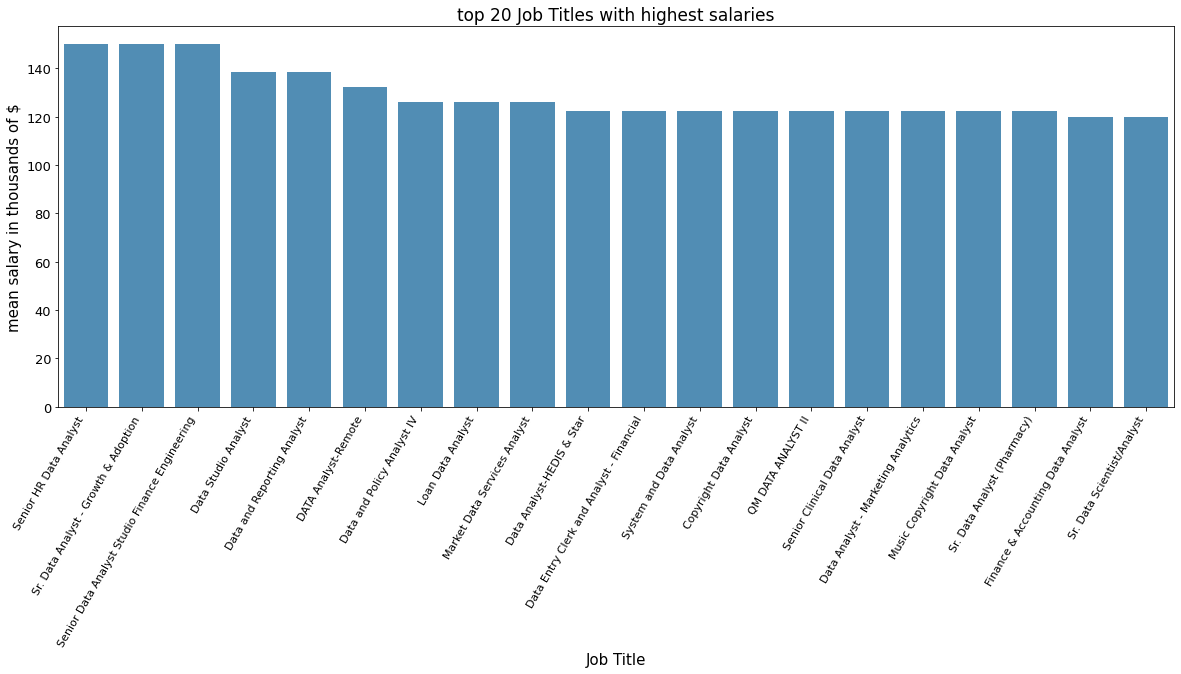

In [ ]:
Title_salary=pd.DataFrame(temp_df.groupby('Job Title')['mean_salary'].mean()).reset_index().sort_values('mean_salary',ascending=False)
plt.figure(figsize=(20,7))
sns.barplot(x=Title_salary['Job Title'].head(20),y=Title_salary['mean_salary'].head(20),color='#4090c5')
plt.xticks(rotation=60,horizontalalignment='right')
plt.ylabel('mean salary in thousands of $',fontsize=15)
plt.xlabel("Job Title",fontsize=15)
plt.title('top 20 Job Titles with highest salaries',fontsize=17)
plt.xticks(fontsize=11)
plt.yticks(fontsize=13)